# Machine Learning Use-case Laboratory Homework 1

## Data preparation/cleaning and Feature Selection.

In [205]:
# Importing necessary libraries.
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import choice
from scipy.stats import pearsonr, spearmanr, f_oneway, chi2_contingency
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

In [106]:
# Fetching the data.
original_data = pd.read_csv('DataSet_LakasArak_labeled.csv')
# Copying the original data to make changes to the non-original one for preserving the original data.
data = original_data.copy()
# Observing the data.
data.head()

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,...,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,split
0,Budapest,Budapest XII.,NaN,flat,brick flat (for sale),good,1,NaN,street view,NaN,...,2.0,1.0,2015-02-09,65.0,0.0,23.5,605.0,119.0,4,test
1,Budapest,Budapest I.,1016.0,flat,brick flat (for sale),novel,2,NaN,street view,NaN,...,1.0,1.0,2015-02-09,45.0,0.0,20.0,49.0,25.0,12,train
2,Budapest,Budapest XVI.,1164.0,flat,brick flat (for sale),novel,1,NaN,garden view,NaN,...,2.0,1.0,2015-02-09,60.0,0.0,22.0,77.0,77.0,14,train
3,Budapest,Budapest X.,NaN,flat,brick flat (for sale),good,4,NaN,garden view,NaN,...,2.0,0.0,2015-02-09,55.0,4.0,11.0,139.0,18.0,21,train
4,Budapest,Budapest XVIII.,1181.0,flat,prefabricated panel flat (for sale),renewed,6,NaN,NaN,NaN,...,2.0,1.0,2015-02-09,60.0,3.0,10.2,176.0,69.0,31,test


In [107]:
# Seeing data dimensions.
data.shape

(78539, 23)

In [110]:
# The dataset shape shows the number of instances and features in the dataset.
num_instances = data.shape[0] # 78539
num_features = data.shape[1] # 16

In [112]:
# Getting general information about the columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78539 entries, 0 to 78538
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   county                   78539 non-null  object 
 1   city                     77980 non-null  object 
 2   postcode                 49585 non-null  float64
 3   property_type            78539 non-null  object 
 4   property_subtype         76880 non-null  object 
 5   property_condition_type  78539 non-null  object 
 6   property_floor           74746 non-null  object 
 7   building_floor_count     36429 non-null  object 
 8   view_type                42878 non-null  object 
 9   orientation              47647 non-null  object 
 10  garden_access            17200 non-null  object 
 11  heating_type             67233 non-null  object 
 12  elevator_type            64388 non-null  object 
 13  room_cnt                 78539 non-null  float64
 14  small_room_cnt        

In [114]:
# Getting statistical information about the data.
data.describe()

,postcode,room_cnt,small_room_cnt,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr
count,49585.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000
mean,1103.358980,1.467666,0.559875,48.440584,1.953182,19.341475,259.599320,44.173684,196334.093240
std,50.769326,0.599840,0.737015,12.716653,4.677227,8.900296,512.351553,47.821006,113305.083861
min,1011.000000,0.000000,0.000000,5.000000,0.000000,0.200000,0.000000,1.000000,4.000000
25%,1064.000000,1.000000,0.000000,40.000000,0.000000,13.200000,42.000000,11.000000,97959.000000
50%,1101.000000,1.000000,0.000000,50.000000,0.000000,16.900000,103.000000,28.000000,196095.000000
75%,1142.000000,2.000000,1.000000,60.000000,3.000000,23.900000,263.000000,61.000000,294516.500000
max,1239.000000,7.000000,4.000000,70.000000,97.000000,99.600000,28096.000000,537.000000,394181.000000


In [116]:
# Making sure column names are consistent.
data.columns = data.columns.str.strip()

In [118]:
# Dropping unnecessary columns that will contribute nothing to the model performance in prediction process.
# Dropping 'property_type' columns because it has been practically covered by 'property_subtype' column so it will add nothing new to our model.
data.drop(columns = ['property_type', ], inplace = True)

In [120]:
# Making sure all data types make sense.
data['property_floor'] = pd.to_numeric(data['property_floor'], errors = 'coerce')

In [122]:
# Observing null values in our dataset.
null_values = data.isnull().sum()
null_values_percentage = (null_values*100/len(data)).round(1)
nulls = pd.DataFrame({
    'Nulls': null_values.values,
    'Nulls %': null_values_percentage.values
}, index = data.columns)
nulls.index.name = 'Columns'

In [124]:
nulls

,Nulls,Nulls %
Columns,,
county,0,0.0
city,559,0.7
postcode,28954,36.9
property_subtype,1659,2.1
property_condition_type,0,0.0
property_floor,20743,26.4
building_floor_count,42110,53.6
view_type,35661,45.4
orientation,30892,39.3


As you can see from above, columns like 'building_floor_count', 'view_type', 'garden_access' have almost half of their values as null which gives us enough reason to get rid of them because if not treated those null values will mess with our predictive models and if replaced somehow they will not represent the real data.  I will remove columns like 'postcode' and 'orientation' as well because of high proportion of null values.

In [127]:
# Dropping those columns with high proportion of null values.
data.drop(columns = ['building_floor_count', 'view_type', 'garden_access', 'postcode', 'orientation'], inplace = True)

In [129]:
data.head()

Columns,county,city,property_subtype,property_condition_type,property_floor,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,split
0,Budapest,Budapest XII.,brick flat (for sale),good,1.0,tile stove (gas),yes,2.0,1.0,2015-02-09,65.0,0.0,23.5,605.0,119.0,4,test
1,Budapest,Budapest I.,brick flat (for sale),novel,2.0,konvection gas burner,yes,1.0,1.0,2015-02-09,45.0,0.0,20.0,49.0,25.0,12,train
2,Budapest,Budapest XVI.,brick flat (for sale),novel,1.0,central heating with own meter,yes,2.0,1.0,2015-02-09,60.0,0.0,22.0,77.0,77.0,14,train
3,Budapest,Budapest X.,brick flat (for sale),good,4.0,central heating,none,2.0,0.0,2015-02-09,55.0,4.0,11.0,139.0,18.0,21,train
4,Budapest,Budapest XVIII.,prefabricated panel flat (for sale),renewed,6.0,NaN,yes,2.0,1.0,2015-02-09,60.0,3.0,10.2,176.0,69.0,31,test


In [131]:
# Let's fill those remaining null values.
data['city'] = data['city'].fillna(value = data['city'].mode()[0])
data['property_subtype'] = data['property_subtype'].fillna(value = data['property_subtype'].mode()[0])
data['property_floor'] = data['property_floor'].fillna(value = data['property_floor'].mean(skipna = True))
data['heating_type'] = data['heating_type'].fillna(value = data['heating_type'].mode()[0])
data['elevator_type'] = data['elevator_type'].fillna(value = data['elevator_type'].mode()[0])

In [133]:
data.isnull().sum()

Columns
county                     0
city                       0
property_subtype           0
property_condition_type    0
property_floor             0
heating_type               0
elevator_type              0
room_cnt                   0
small_room_cnt             0
created_at                 0
property_area              0
balcony_area               0
price_created_at           0
ad_view_cnt                0
active_days                0
nr                         0
split                      0
dtype: int64

In [135]:
# We should deal with date columns like 'created_at' as well because it will trouble in modeling session.
# Firstly, we need to make sure all date columns are in the date format and then we need to make them numerical to be able to feed them into a model.
data['created_at'].dtype

dtype('O')

In [137]:
# We need to convert the data type of this columns from 'object' to 'datetime'.
data['created_at'] = pd.to_datetime(data['created_at'], format = '%Y-%m-%d', errors = 'coerce')

In [139]:
# Now we need to extract usefull numerical value out this date columns to feed into the model. My idea is to extract 'days_since_created'.
date_max = data['created_at'].max()
data['days_since_created'] = (date_max - data['created_at']).dt.days

In [141]:
# The newly created columns now can confidently be fed into a model.
data['days_since_created']

0        567
1        567
2        567
3        567
4        567
        ... 
78534      0
78535      0
78536      0
78537      0
78538      0
Name: days_since_created, Length: 78539, dtype: int64

In [143]:
# Dropping now unnecessary column 'created_at'.
data.drop(columns = 'created_at', inplace = True)

In [145]:
data['county'].nunique()

1

In [147]:
# As 'county' columns has only single value it will contribute nothing to our model so we need to drop it.
data.drop(columns = 'county', inplace = True)

In [149]:
# We need to get rid of duplicates as well.
data = data.drop_duplicates()

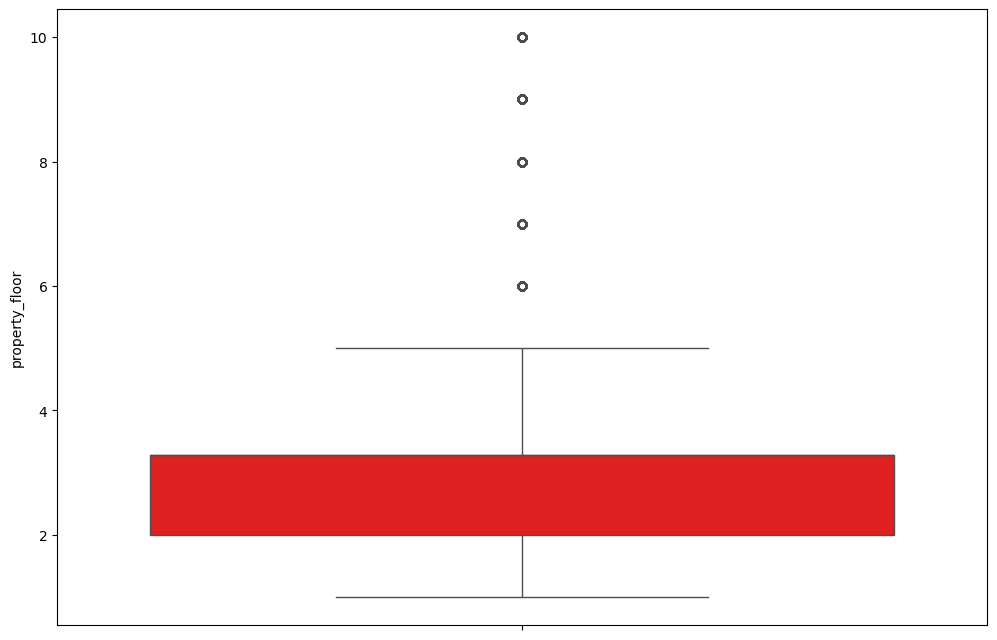

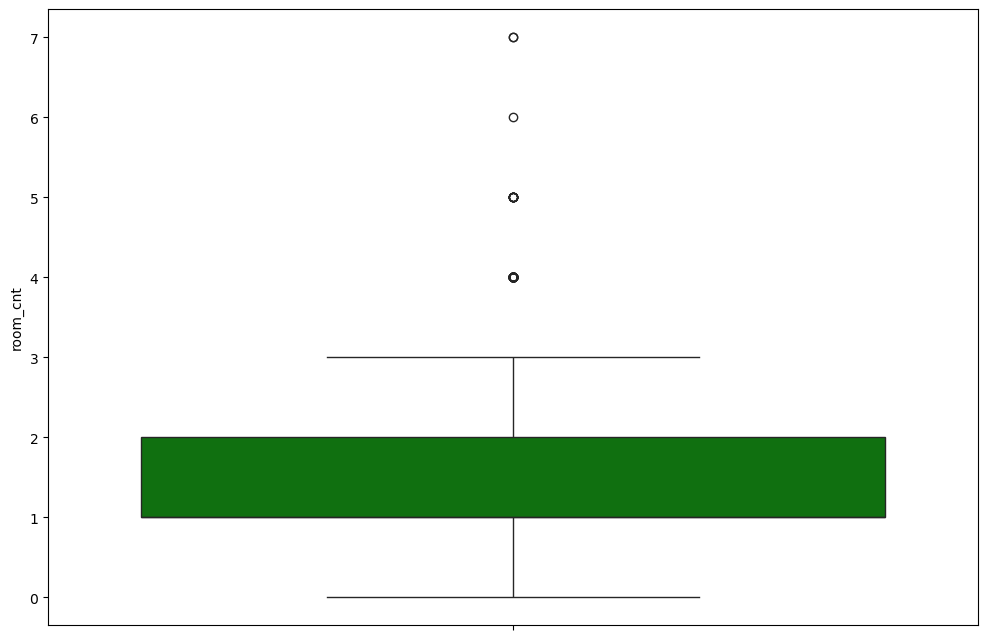

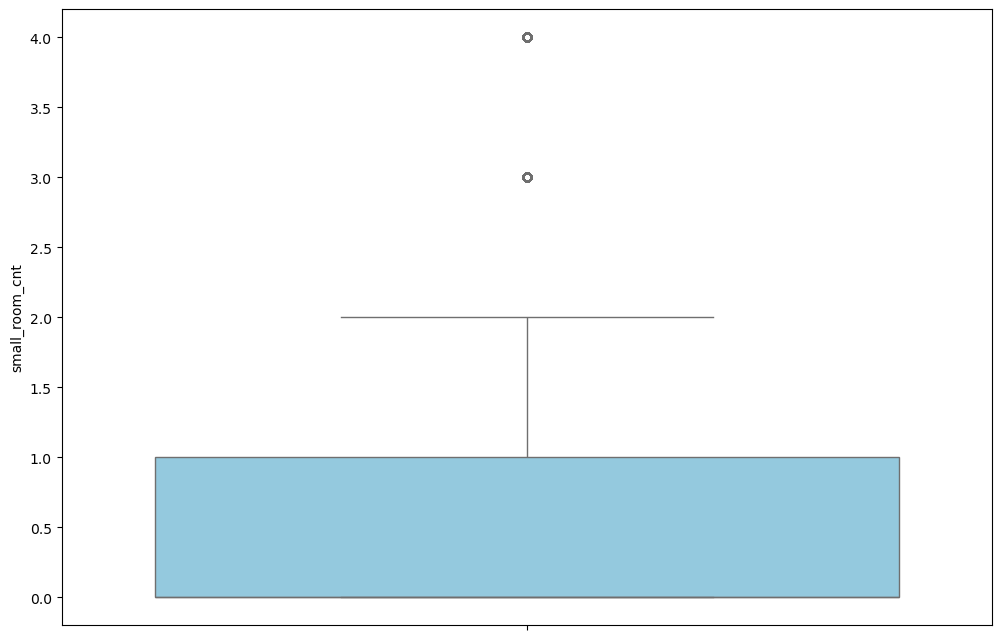

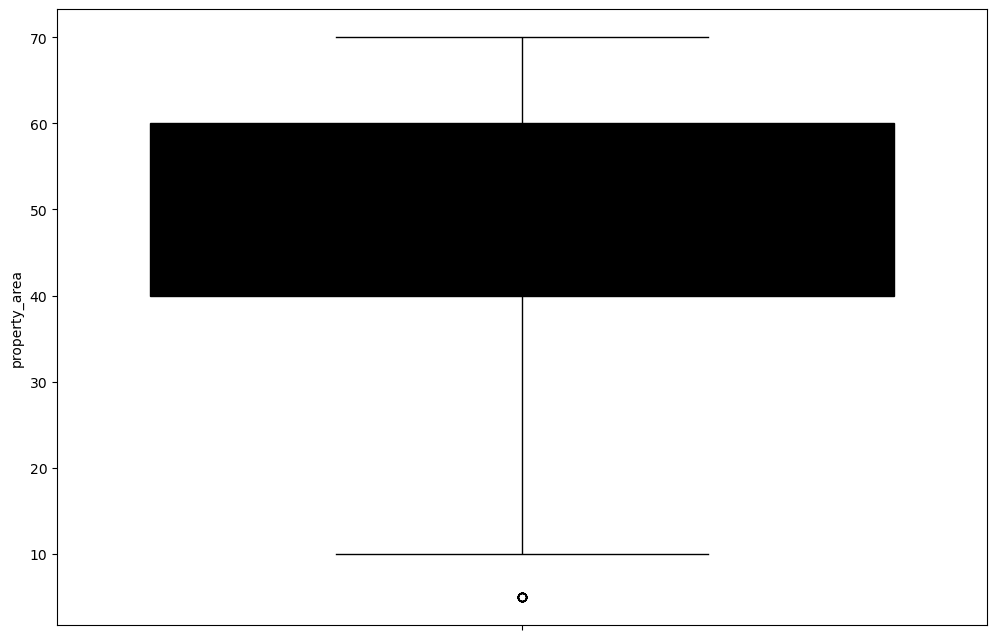

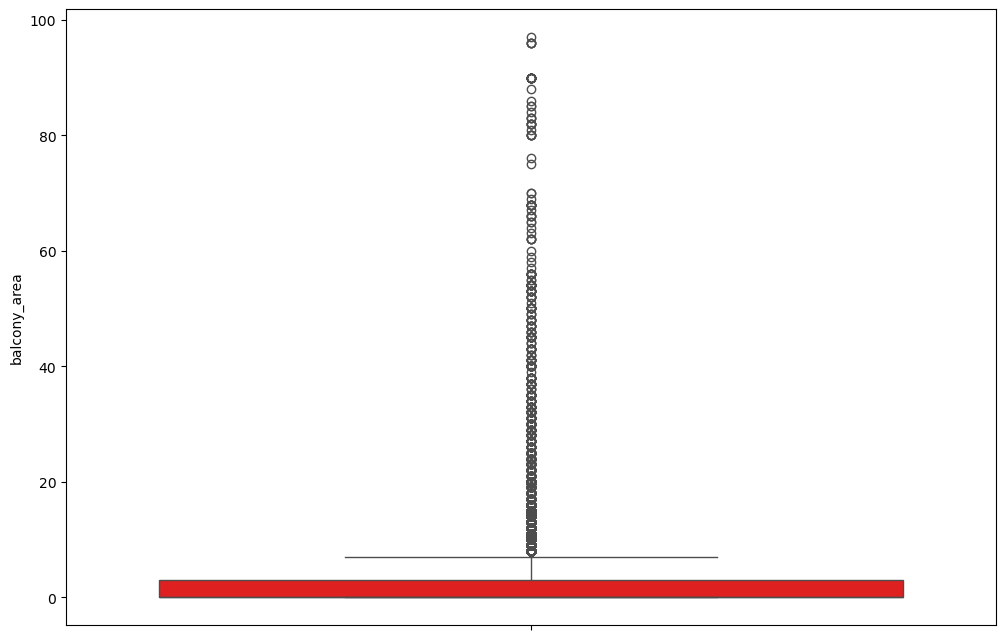

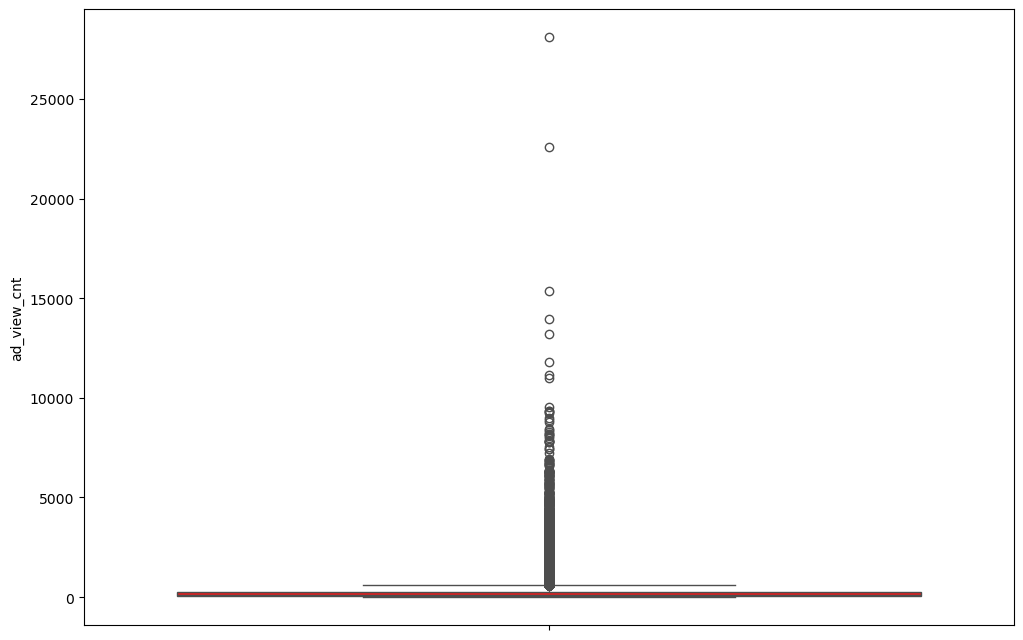

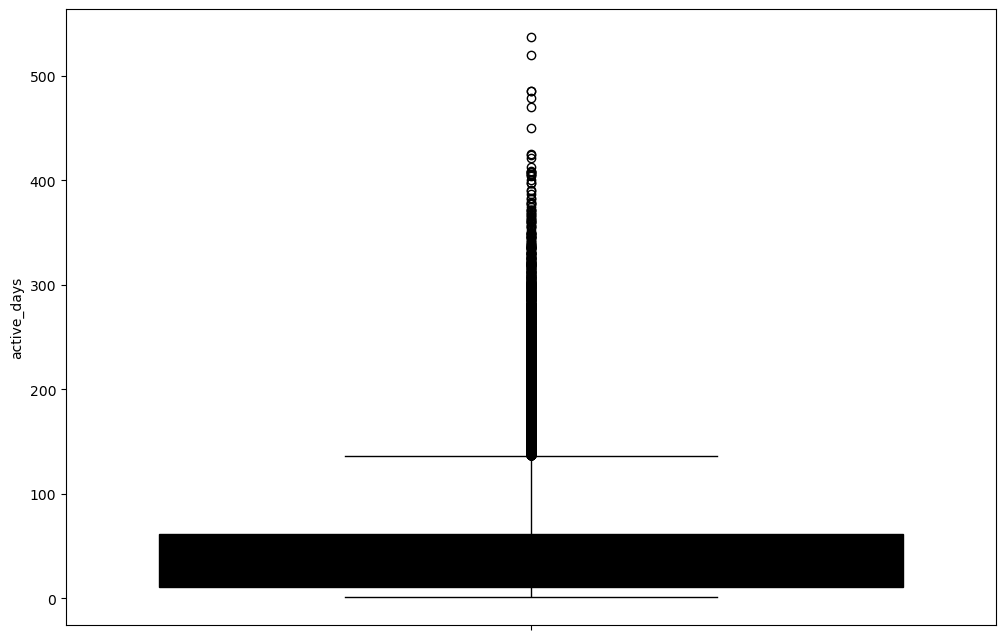

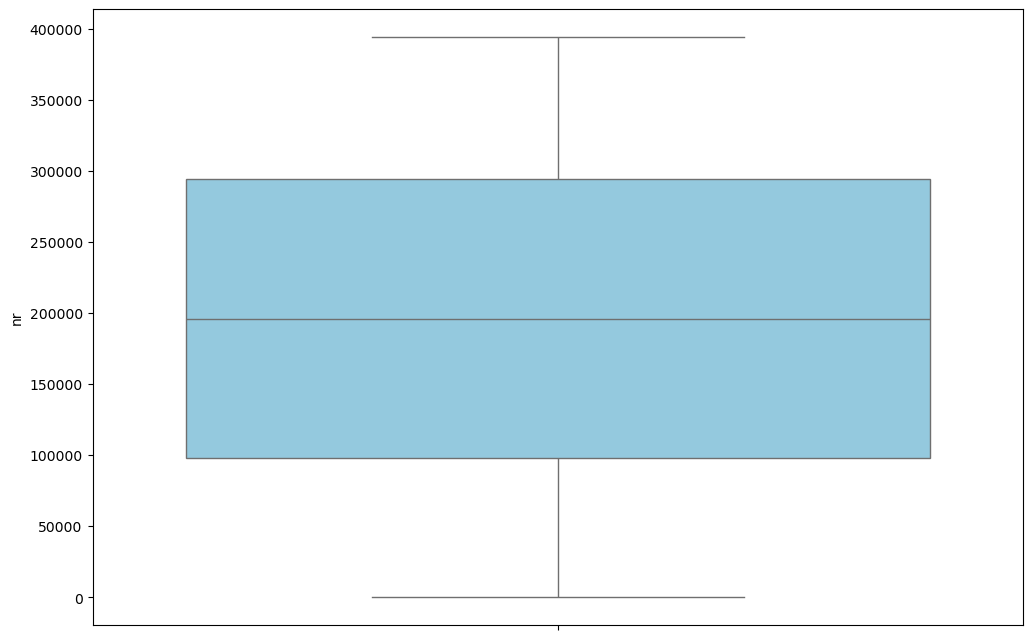

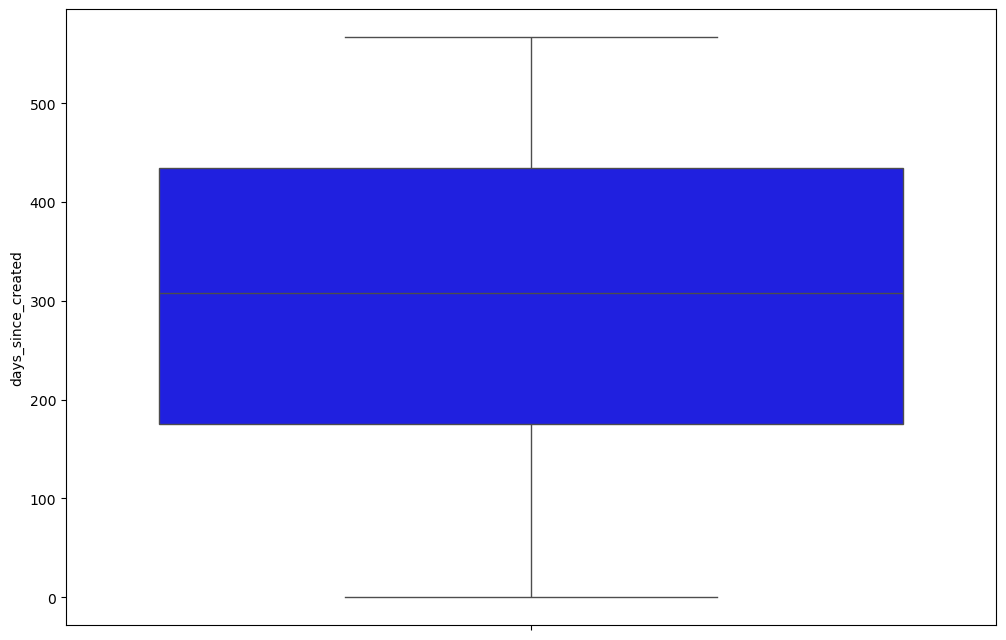

In [151]:
# To see the outliers visually I will use boxplot.
# Firstly, I will select numerical columns to remove outliers.
num_cols = data.select_dtypes(exclude = ['object', 'category']).drop(columns = 'price_created_at').columns
colors = ['blue', 'red', 'green', 'orange', 'black', 'skyblue']
for i in num_cols:
    plt.figure(figsize = (12, 8))
    sns.boxplot(data = data, y = i, color = choice(colors))

We have many outliers in columns - 'active_days', 'ad_view_cnt', 'balcony_area' and some in 'property_floor', 'room_cnt', 'small_room_cnt'. I will clip those outliers intead of removing because I do not want to lose any of the data instances.

In [153]:
# We will handle outliers as well. I will clip them into lower and higher bounds instead of removing them.
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

data[num_cols] = data[num_cols].clip(lower = lower_bound, upper = upper_bound, axis = 1)

In [154]:
data.head()

Columns,city,property_subtype,property_condition_type,property_floor,heating_type,elevator_type,room_cnt,small_room_cnt,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,split,days_since_created
0,Budapest XII.,brick flat (for sale),good,1.000000,tile stove (gas),yes,2.0,1.0,65.0,0.0,23.5,594.5,119.0,4,test,567
1,Budapest I.,brick flat (for sale),novel,2.000000,konvection gas burner,yes,1.0,1.0,45.0,0.0,20.0,49.0,25.0,12,train,567
2,Budapest XVI.,brick flat (for sale),novel,1.000000,central heating with own meter,yes,2.0,1.0,60.0,0.0,22.0,77.0,77.0,14,train,567
3,Budapest X.,brick flat (for sale),good,4.000000,central heating,none,2.0,0.0,55.0,4.0,11.0,139.0,18.0,21,train,567
4,Budapest XVIII.,prefabricated panel flat (for sale),renewed,5.206061,konvection gas burner,yes,2.0,1.0,60.0,3.0,10.2,176.0,69.0,31,test,567


In [155]:
# I will scale the numerical columns just in case. It is good a practice to scale numerical variables before feeding them into a model.
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [156]:
data[num_cols]

Columns,property_floor,room_cnt,small_room_cnt,property_area,balcony_area,ad_view_cnt,active_days,nr,days_since_created
0,-1.480717,0.893473,0.631148,1.302400,-0.626885,2.173222,2.021083,-1.732767,1.737560
1,-0.730331,-0.782628,0.631148,-0.270681,-0.626885,-0.714823,-0.425486,-1.732697,1.737560
2,-1.480717,0.893473,0.631148,0.909130,-0.626885,-0.566583,0.927935,-1.732679,1.737560
3,0.770441,0.893473,-0.777884,0.515859,1.026452,-0.238335,-0.607677,-1.732617,1.737560
4,1.675452,0.893473,0.631148,0.909130,0.613118,-0.042446,0.719717,-1.732529,1.737560
...,...,...,...,...,...,...,...,...,...
78534,-1.480717,0.893473,-0.777884,1.302400,-0.626885,-0.921301,-1.050141,1.746048,-2.004099
78535,0.231982,-0.782628,-0.777884,-1.057221,-0.626885,-0.884241,-1.050141,1.746093,-2.004099
78536,0.231982,-0.782628,-0.777884,-1.843761,-0.626885,-0.677763,-1.050141,1.746110,-2.004099
78537,0.231982,-0.782628,0.631148,-0.663951,-0.626885,-0.487168,-1.050141,1.746137,-2.004099


# Feature Selection

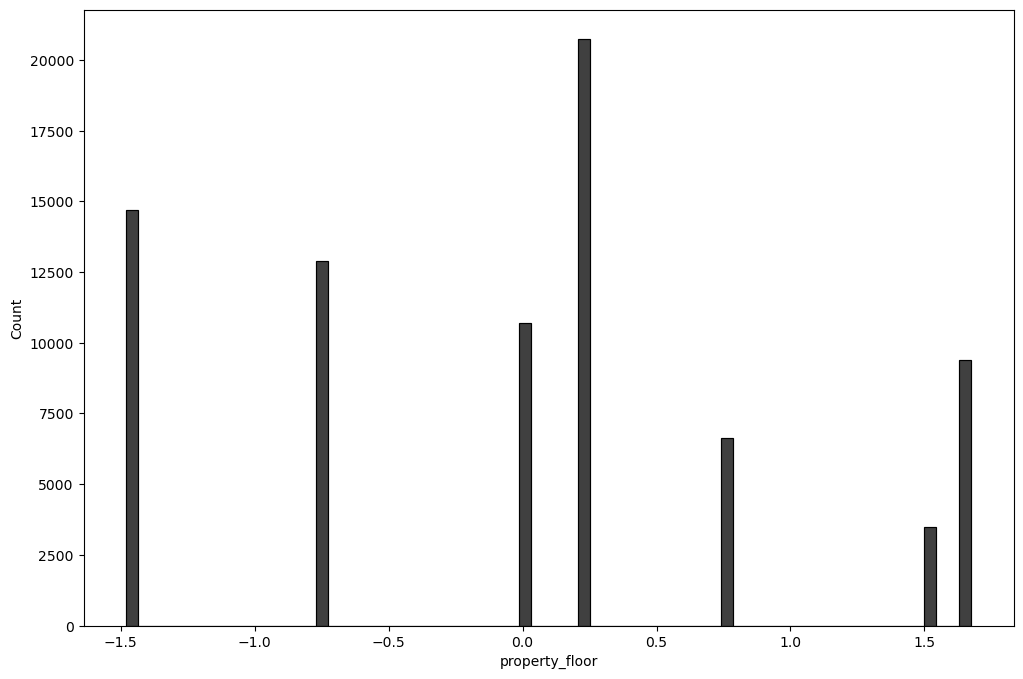

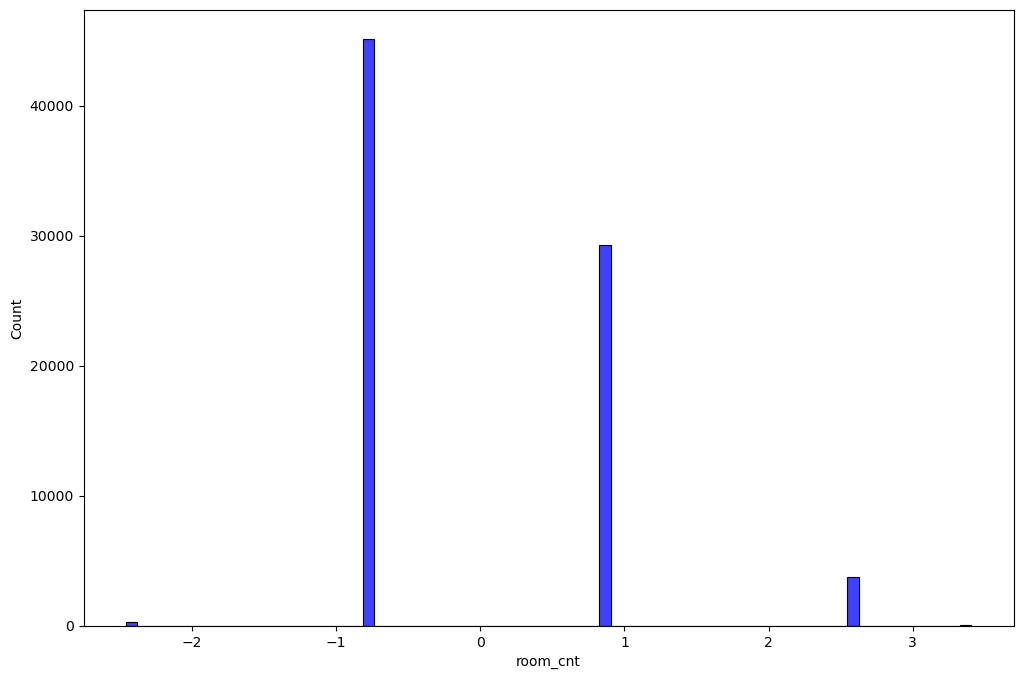

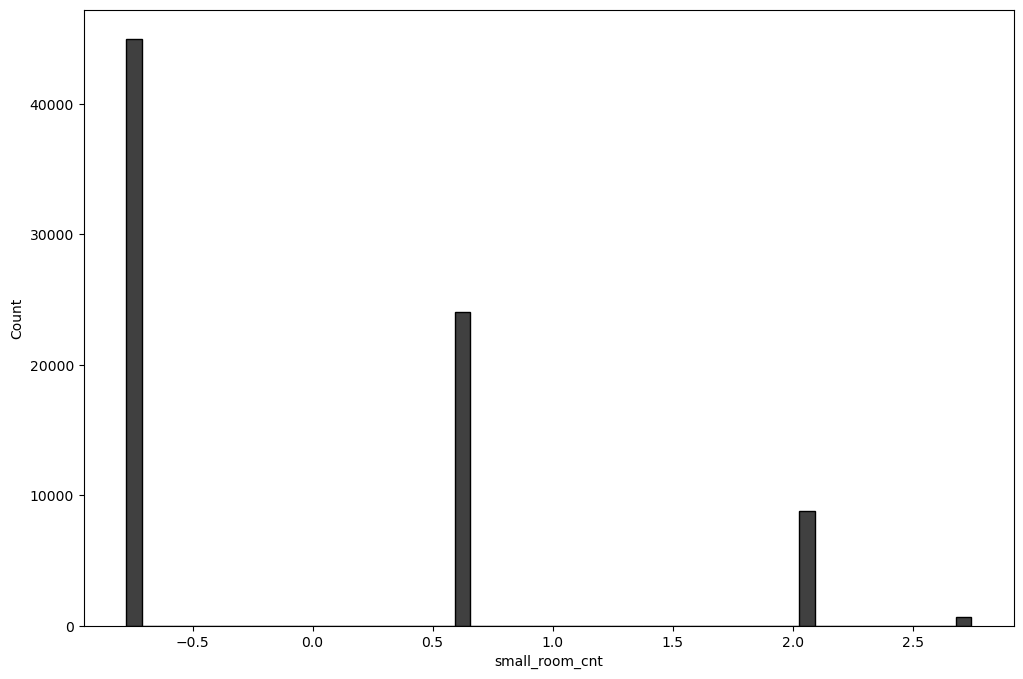

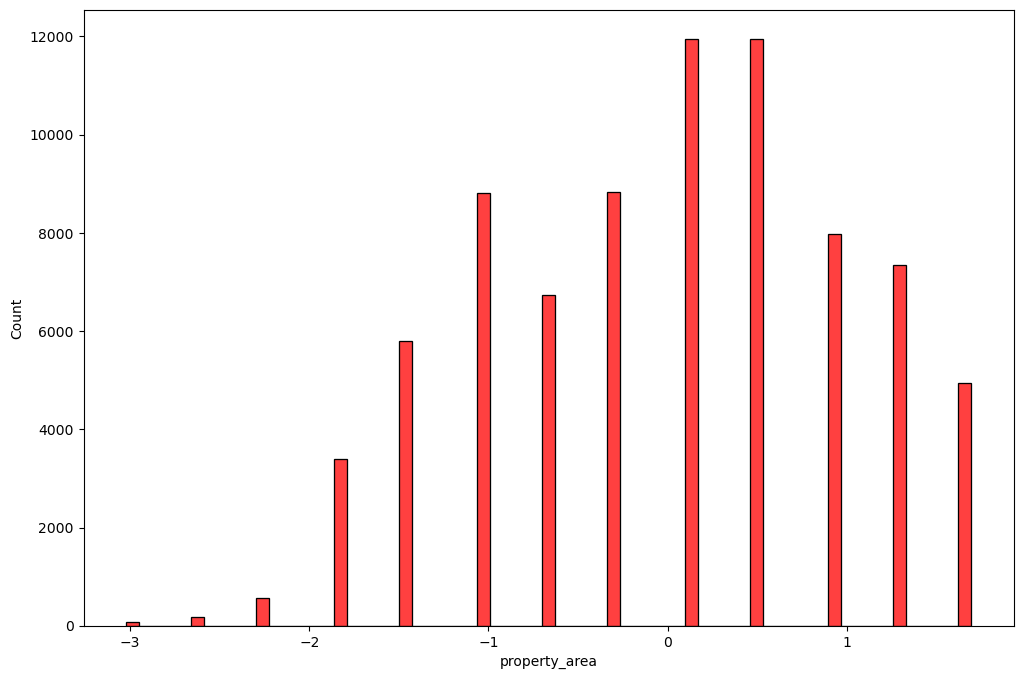

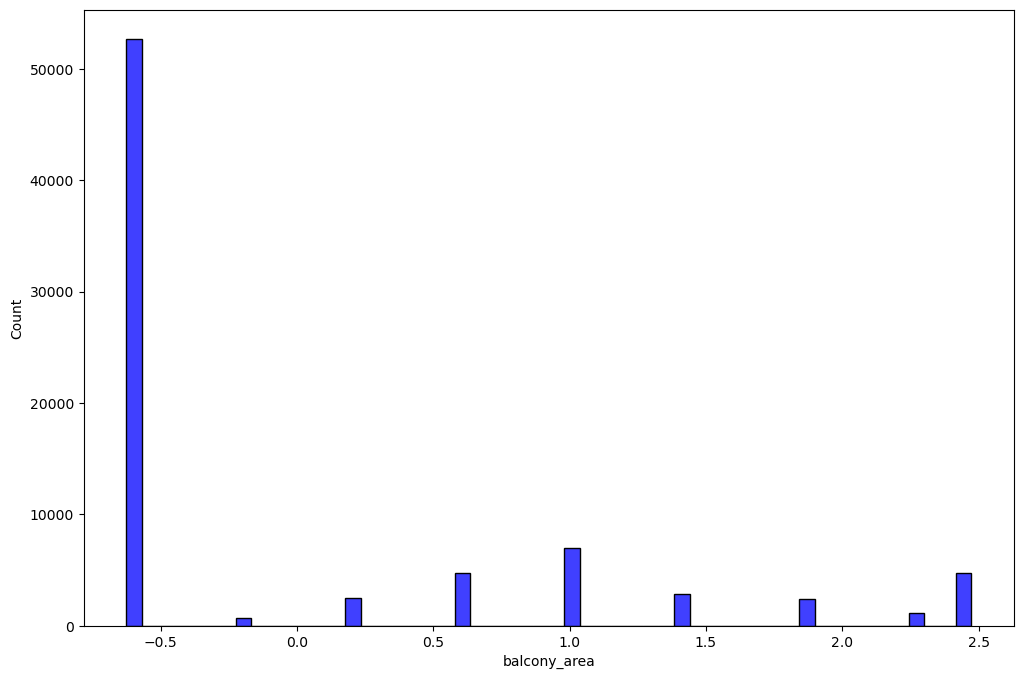

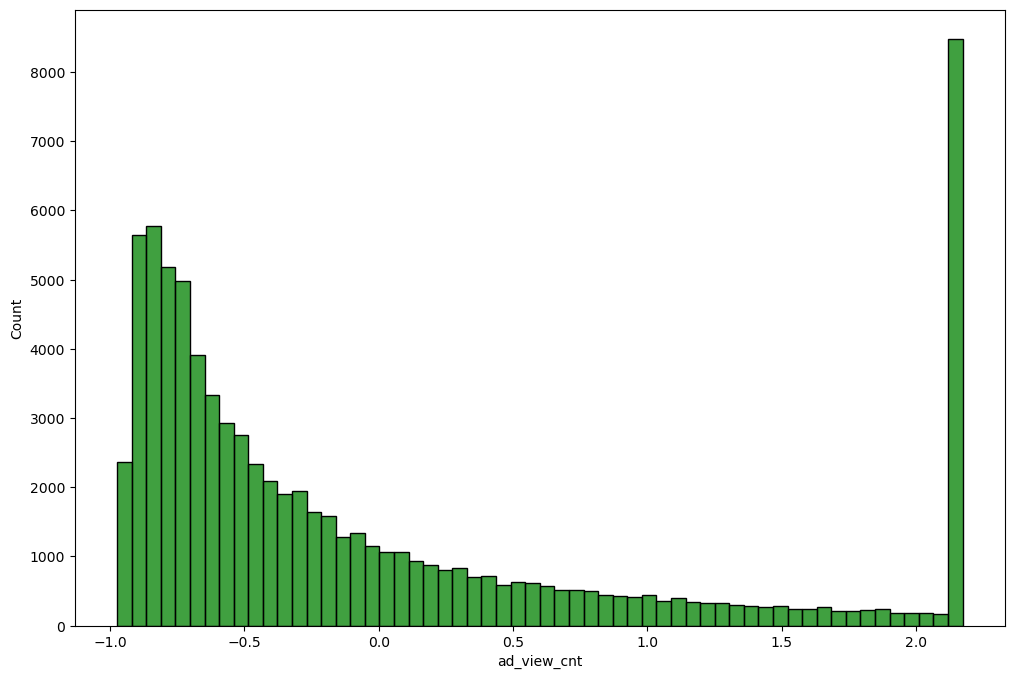

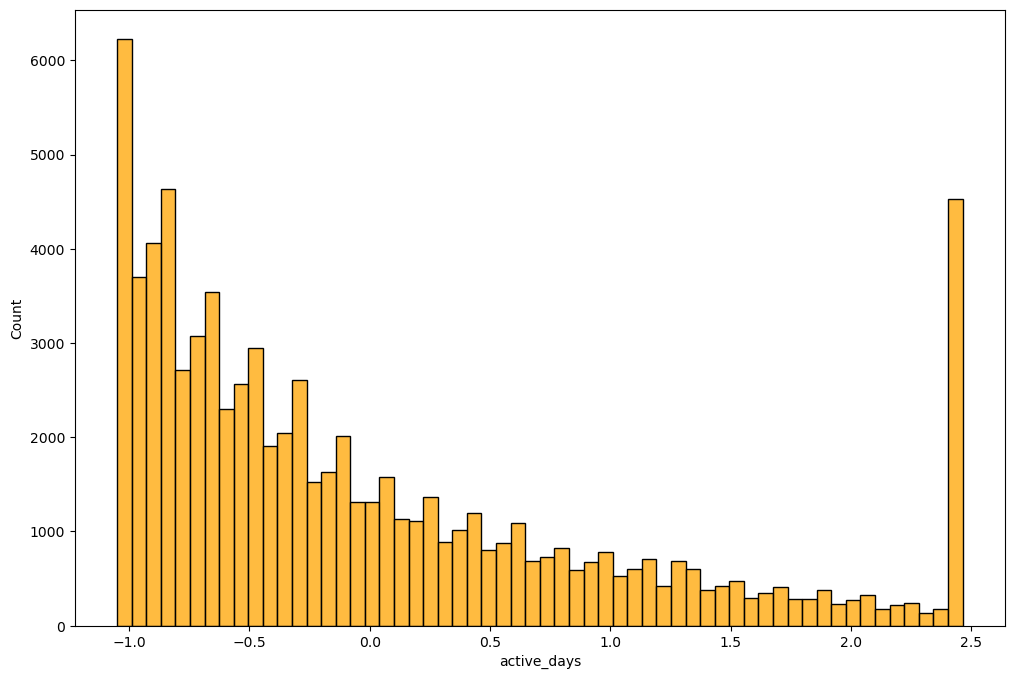

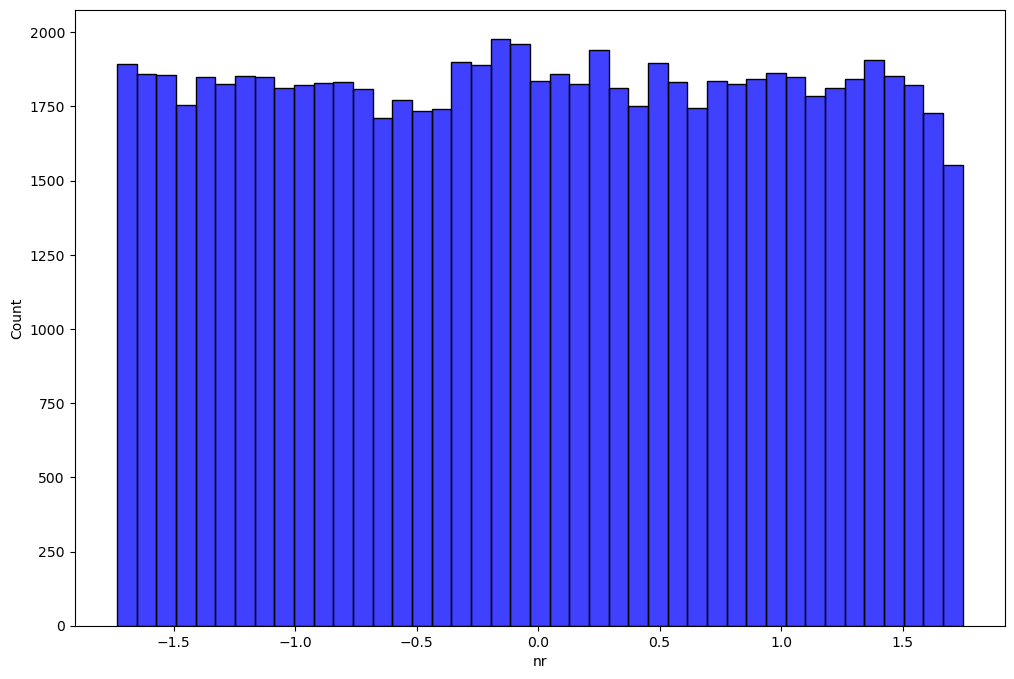

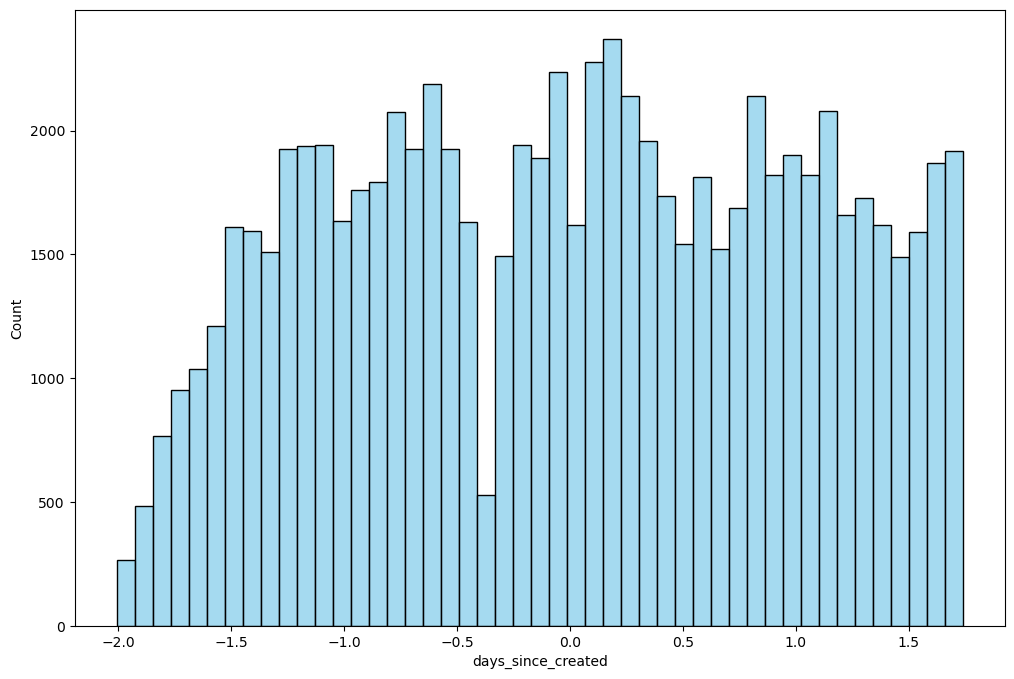

In [158]:
# Now let's dive deep into feature selection. Let's see distribution of numerical columns.
for num in num_cols:
    plt.figure(figsize = (12, 8))
    sns.histplot(data, x = num, color = choice(colors))

Some of the numerical columns have normal distribution and some do not.

In [164]:
# Now let's check the relationhip between numerical variables to see if there is multicollinearity in our dataset.
pearson_values = []
for idx, i in enumerate(num_cols):
    for j in num_cols[idx + 1:]:
        if i != j:
            correlation, p_value = pearsonr(data[i], data[j])
            pearson_values.append({
                'Column1': i,
                'Column2': j,
                'Correlation': correlation,
                'P-value': p_value
            })
pearson_values = pd.DataFrame(pearson_values)

In [166]:
# Let's look at our result.
pearson_values

,Column1,Column2,Correlation,P-value
0,property_floor,room_cnt,0.031956,3.317096e-19
1,property_floor,small_room_cnt,0.097781,4.210073e-166
2,property_floor,property_area,0.047142,6.842937e-40
3,property_floor,balcony_area,0.059059,1.237924e-61
4,property_floor,ad_view_cnt,0.003577,3.160784e-01
5,property_floor,active_days,-0.012344,5.413873e-04
6,property_floor,nr,0.013544,1.471466e-04
7,property_floor,days_since_created,-0.013480,1.582409e-04
8,room_cnt,small_room_cnt,-0.359490,0.000000e+00
9,room_cnt,property_area,0.594834,0.000000e+00


In [167]:
'''
Now let's observe only those relationships that have p_value less than 0.05. If the p value is less than 0.06 then we can assume that linear
relationship between those numerical variables are significant enough to be taken into account.
'''
pearson_values[pearson_values['P-value'] < 0.05]

,Column1,Column2,Correlation,P-value
0,property_floor,room_cnt,0.031956,3.317096e-19
1,property_floor,small_room_cnt,0.097781,4.210073e-166
2,property_floor,property_area,0.047142,6.842937e-40
3,property_floor,balcony_area,0.059059,1.237924e-61
5,property_floor,active_days,-0.012344,5.413873e-04
6,property_floor,nr,0.013544,1.471466e-04
7,property_floor,days_since_created,-0.013480,1.582409e-04
8,room_cnt,small_room_cnt,-0.359490,0.000000e+00
9,room_cnt,property_area,0.594834,0.000000e+00
10,room_cnt,balcony_area,0.136648,0.000000e+00


The correlations are very small so I will keep all the columns in the dataset.

In [173]:
# Now let's see relationship of the numerical columns to our target variable. As our target variable is numerical as well I will pearson correlation again.
pearson_values2 = []
for i in num_cols:
    correlation, p_value = pearsonr(data[i], data['price_created_at'])
    pearson_values2.append({
        'Column': i,
        'Correlation': correlation,
        'P-value': p_value
    })
pearson_values2 = pd.DataFrame(pearson_values2)
pearson_values2

,Column,Correlation,P-value
0,property_floor,-0.097833,2.796220e-166
1,room_cnt,0.292620,0.000000e+00
2,small_room_cnt,0.045354,4.777400e-37
3,property_area,0.451698,0.000000e+00
4,balcony_area,0.204992,0.000000e+00
5,ad_view_cnt,-0.126521,1.411376e-277
6,active_days,0.081669,2.590881e-116
7,nr,0.193351,0.000000e+00
8,days_since_created,-0.192708,0.000000e+00


In [175]:
# Now let's see correlations with P-value less than 0.05 (significant ones).
pearson_values2[pearson_values2['P-value'] < 0.05]

,Column,Correlation,P-value
0,property_floor,-0.097833,2.796220e-166
1,room_cnt,0.292620,0.000000e+00
2,small_room_cnt,0.045354,4.777400e-37
3,property_area,0.451698,0.000000e+00
4,balcony_area,0.204992,0.000000e+00
5,ad_view_cnt,-0.126521,1.411376e-277
6,active_days,0.081669,2.590881e-116
7,nr,0.193351,0.000000e+00
8,days_since_created,-0.192708,0.000000e+00


All correlations are significant. Property area is the most correlated feature to the target with 45% and the small room count is the least correlated feature to the target variable. As we already have room count with high correlation I will get rid of 'small_room_cnt' column to potentiall increase the performance of model. Because in regression problems weekly correlated features creates problems to models.

In [178]:
# Dropping column 'small_room_cnt'
data.drop(columns = 'small_room_cnt', inplace = True)

In [180]:
# Now let's see relationship of categorical features to our numerical target column. Here I will use ANOVA test.
cat_cols = data.select_dtypes(include = ['object', 'category']).drop(columns = 'split').columns
anova = []
for col in cat_cols:
    groups = [data.loc[data[col] == cat, 'price_created_at'] for cat in data[col].unique()]
    f_score, p_value = f_oneway(*groups)
    anova.append({
        'Column': col,
        'F-score': f_score,
        'P-value': p_value
    })
anova = pd.DataFrame(anova)

In [181]:
anova

,Column,F-score,P-value
0,city,1580.779025,0.000000e+00
1,property_subtype,7093.204597,0.000000e+00
2,property_condition_type,1103.115545,0.000000e+00
3,heating_type,1941.835696,0.000000e+00
4,elevator_type,1453.427472,3.994710e-315


All of the categorical features are significatly related to the target variable. Explaining in terms of ANOVA test, we can say that means of different categorical values inside each these columns differ significantly from each other. We will keep all data features here.

In [185]:
# Now let's encode categorical columns. There are types of encoding like Label Encoding, Ordinal Encoding, Onehot encoding or creating Dummies.
# In our dataset there is no any ordinal column that has logical order, so I will only use dummy encoding.
# Firstly, let's differentiate our categorical columns.
cat_cols = data.select_dtypes(include = ['object', 'category']).drop(columns = 'split').columns
data = pd.get_dummies(data, columns = cat_cols, drop_first = True)

In [187]:
data.head()

,property_floor,room_cnt,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,split,days_since_created,...,heating_type_central heating with own meter,heating_type_district heating,heating_type_electric,heating_type_fan-coil,heating_type_gas furnace,"heating_type_gas furnace, circulating hot water",heating_type_konvection gas burner,heating_type_other,heating_type_tile stove (gas),elevator_type_yes
0,-1.480717,0.893473,1.302400,-0.626885,23.5,2.173222,2.021083,-1.732767,test,1.73756,...,False,False,False,False,False,False,False,False,True,True
1,-0.730331,-0.782628,-0.270681,-0.626885,20.0,-0.714823,-0.425486,-1.732697,train,1.73756,...,False,False,False,False,False,False,True,False,False,True
2,-1.480717,0.893473,0.909130,-0.626885,22.0,-0.566583,0.927935,-1.732679,train,1.73756,...,True,False,False,False,False,False,False,False,False,True
3,0.770441,0.893473,0.515859,1.026452,11.0,-0.238335,-0.607677,-1.732617,train,1.73756,...,False,False,False,False,False,False,False,False,False,False
4,1.675452,0.893473,0.909130,0.613118,10.2,-0.042446,0.719717,-1.732529,test,1.73756,...,False,False,False,False,False,False,True,False,False,True


## Model selection

In [190]:
# The target column in our dataset is 'price_created_at' which indicates the prices of houses. We need to use Regression models to predict this target column.
gt_feature = 'price_created_at'

In [192]:
# Now let's make manual train test split for our dataset. The row being train or test has been indicated by 'split' column.
x_train = data[data['split'] == 'train'].drop(columns = ['split', 'price_created_at'])
x_test = data[data['split'] == 'test'].drop(columns = ['split', 'price_created_at'])
y_train = data[data['split'] == 'train']['price_created_at']
y_test = data[data['split'] == 'test']['price_created_at']

In [194]:
# The following is just to assert that the data is complete and none of th einstances was dropped
test_perc = 0.3
train_perc = 1 - test_perc

assert (len(x_train) + len(x_test)) == num_instances
assert len(x_train) == int(train_perc*num_instances)
assert len(x_test) == (num_instances - len(x_train))

In [196]:
# For prediction, I will use the following function.
# The selected model has to learn the features in the data before giving an educated prediction. Why?
# - It is called machine learning for that exact reason it is like giving a student set of questions and their answers (training process) for them to learn. 
# - And then we give the same student different set of questions (testing process) to answer based on what they learned from training process.
# We first fit the model using the train data, then use it to predict labels (prices) for the test instances. Why?
# - As I explained above firstly we do training, let the model learn before making predictions.
def model_predict(model, x_train, y_train, x_test):
    # fitting the model
    model = model
    model.fit(x_train, y_train)
    # make predictions
    pred = model.predict(x_test)
    return model, pred

In [198]:
# LinearRegression.
model_1 = LinearRegression()
model_1, pred_1 = model_predict(model_1, x_train, y_train, x_test)

In [200]:
# GradientBoostingRegressor.
model_2 = GradientBoostingRegressor(loss = 'squared_error', learning_rate = 0.01, n_estimators = 200)
model_2, pred_2 = model_predict(model_2, x_train, y_train, x_test)

In [202]:
# RandomForestRegressor.
model_3 = RandomForestRegressor(n_estimators = 100)
model_3, pred_3 = model_predict(model_3, x_train, y_train, x_test)

# Evaluation

In [207]:
# For evaluation I will use Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and Root Mean Square Error (RMSE).
def model_evaluate(pred, target):
    mae = mean_absolute_error(target, pred)
    mape = mean_absolute_percentage_error(target, pred)
    rmse = root_mean_squared_error(target, pred)
    return mae, mape, rmse

In [209]:
# Getting the values of the metrics for each model.
mae1, mape1, rmse1 = model_evaluate(pred_1, y_test)
mae2, mape2, rmse2 = model_evaluate(pred_2, y_test)
mae3, mape3, rmse3 = model_evaluate(pred_3, y_test)

In [211]:
model_performance = pd.DataFrame({
    'LinearRegression': [mae1, mape1, rmse1],
    'GradientBoostingRegressor': [mae2, mape2, rmse2],
    'RandomForestRegressor': [mae3, mape3, rmse3],
}, index = ['MAE', 'MAPE', 'RMSE'])

In [213]:
model_performance

,LinearRegression,GradientBoostingRegressor,RandomForestRegressor
MAE,3.291929,4.492079,2.458838
MAPE,0.177473,0.261848,0.129851
RMSE,4.981468,6.393630,4.251023


For LinearRegression mean absolute error of 3.29 and mean absolute percentage error of 0.17 (17%) are reasonable even though RandomForestRegressor does better in those metrices. Root mean squared error of 4.98 suggests that error are fairly large, and it suffers when large deviations occur. Overall, Linear Regression performs decently but does not capture complex non-linear relationships well giving signs of overfitting.

For GradientBoostingRegressor, all 3 metrices - mean absolute error of 4.5, mean absolute percentage error of 0.26, root mean squared error of 6.3 were the highest and therefor the worst among the three. Hyperparameter tuning can possible solve this issue.

**RandomForestRegressor** outperforms all other 2 models in terms of all 3 metrices and performed the **best**.